<a href="https://colab.research.google.com/github/hemraj4545/Projects/blob/master/GRIP_Tasks/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To explore Business Analytics
###Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore.’ You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit.

###Business problems that can be derived by looking into the data?
- How much is the sales, profit and quantity sold varies region-wise, state-wise and segment-wise, category-wise?
- Which category of items gives the more profit and sold more?
- Which type of mode is suitable for more profit?


# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Data

In [2]:
url = "https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view"
path = "https://drive.google.com/uc?export=download&id="+url.split('/')[-2]
data = pd.read_csv(path)
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data Exploration

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [26]:
data.shape

(9994, 13)

In [27]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Data Preparation

In [6]:
data = data.drop(['Country','Postal Code','Discount'],axis=1)

* Dropping columns - Country, Postal Code, Discount, these are the fields which do not contribute much to predict the profit, sales.

In [29]:
category_group = data.groupby(['Category','Sub-Category'])['Sales','Quantity','Profit'].mean().reset_index()
segment_group = data.groupby(['Segment'])['Sales','Quantity','Profit'].mean().reset_index()
region_group = data.groupby(['Region'])['Sales','Quantity','Profit'].mean().reset_index()
state_group = data.groupby(['State'])['Sales','Quantity','Profit'].mean().reset_index()
shipmode_group = data.groupby(['Ship Mode'])['Sales','Quantity','Profit'].mean().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: Futur

* Grouping the data Region-wise, State-Wise, Segment-Wise, Categry-wise and ShipMode-wise.

# Explanatory Data Analysis

## EDA Category-Wise

In [7]:
category_group

,Category,Sub-Category,Sales,Quantity,Profit
0,Furniture,Bookcases,503.859633,3.807018,-15.230509
1,Furniture,Chairs,532.332420,3.818476,43.095894
2,Furniture,Furnishings,95.825668,3.723093,13.645918
3,Furniture,Tables,648.794771,3.890282,-55.565771
4,Office Supplies,Appliances,230.755710,3.710300,38.922758
5,Office Supplies,Art,34.068834,3.768844,8.200737
6,Office Supplies,Binders,133.560560,3.922521,19.843574
7,Office Supplies,Envelopes,64.867724,3.566929,27.418019
8,Office Supplies,Fasteners,13.936774,4.211982,4.375660
9,Office Supplies,Labels,34.303055,3.846154,15.236962


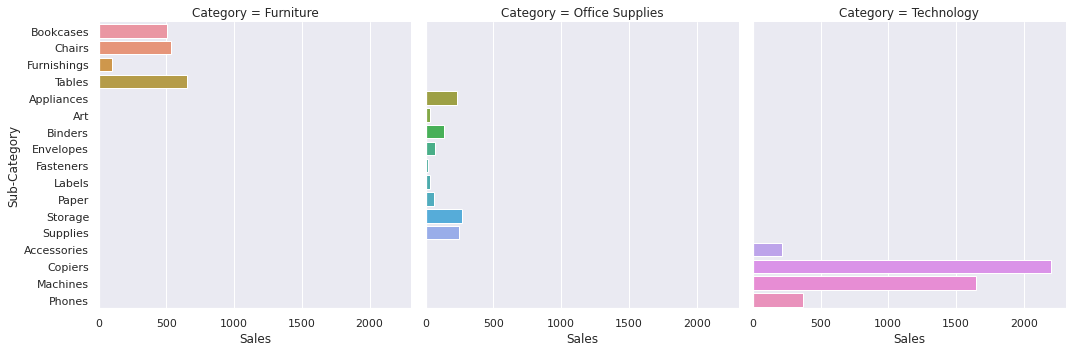

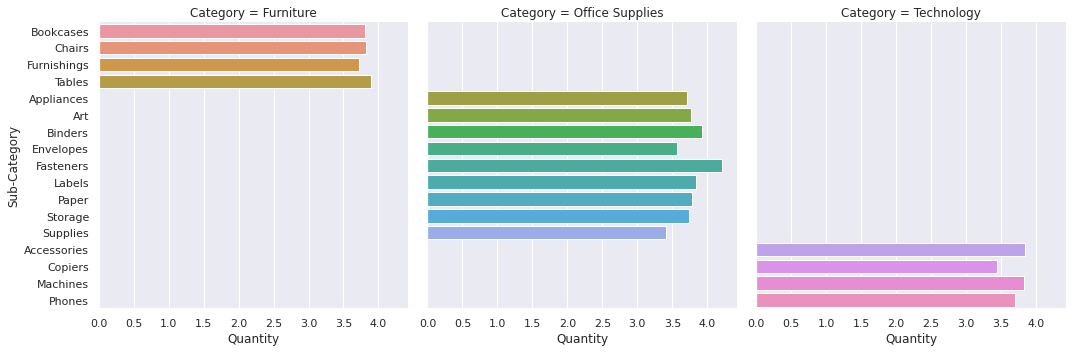

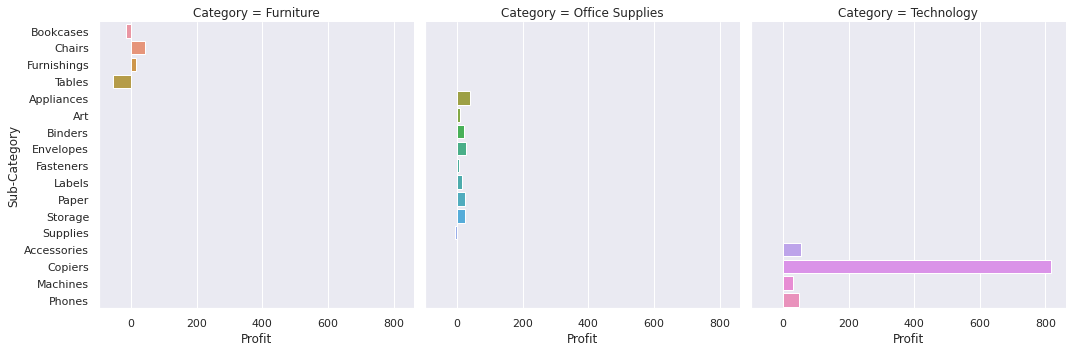

In [8]:
x = sns.catplot(x="Sales", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

y = sns.catplot(x="Quantity", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

z = sns.catplot(x="Profit", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

From these graphs, we can conclude that
* In technology category, Sales are more than other two category.
* In technology category, Copiers and Machines are sold the most.
* Quantity of products are almost sold in equal amount in each category.
* In Furniture category, Bookcases and Tables are incurring a lose.
* In Office Supplies category, there is a very minimal profit in all sub-categories.
* In technology category, Copiers provide the most profit among all others.

## EDA Segment-Wise

In [34]:
segment_group

,Segment,Sales,Quantity,Profit
0,Consumer,223.733644,3.760547,25.836873
1,Corporate,233.823300,3.843709,30.456667
2,Home Office,240.972041,3.782389,33.818664


Text(0.5, 1.0, 'Segment-Wise Profit Gained')

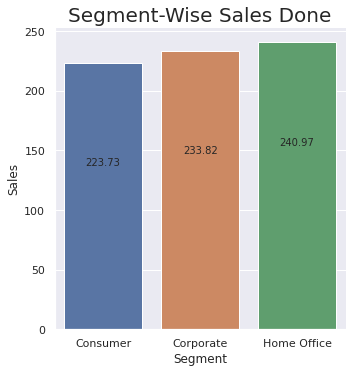

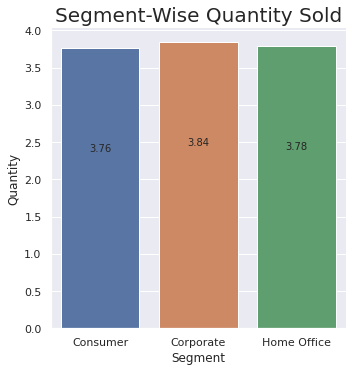

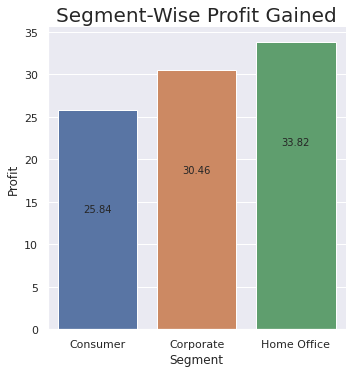

In [35]:
x = sns.catplot(x="Segment", y="Sales", data=segment_group, kind='bar')
for ax in x.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment-Wise Sales Done", fontsize=20)

y = sns.catplot(x="Segment", y="Quantity", data=segment_group, kind='bar')
for ax in y.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment-Wise Quantity Sold", fontsize=20)

z = sns.catplot(x="Segment", y="Profit", data=segment_group, kind='bar')
for ax in z.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment-Wise Profit Gained", fontsize=20)

From these graphs, we can conclude that
* All types of Segments have shown almost same number of sales.
* All types of Segments have shown almost same number of quantity sold.
* Profit gained in the Home Office segment is higher comparing other two segments and Consumer Segment being the lowest.

## EDA Region-Wise

In [10]:
region_group.head(10)

,Region,State,City,Sales,Quantity,Profit
0,Central,Illinois,Arlington Heights,14.112000,6.000000,1.234800
1,Central,Illinois,Aurora,222.734353,3.764706,-55.727047
2,Central,Illinois,Bloomington,120.492500,3.375000,-54.016037
3,Central,Illinois,Bolingbrook,36.384667,3.833333,-0.776833
4,Central,Illinois,Buffalo Grove,415.699500,5.000000,-44.823900
5,Central,Illinois,Carol Stream,261.162000,3.600000,-7.973660
6,Central,Illinois,Champaign,151.960000,5.000000,-182.352000
7,Central,Illinois,Chicago,154.584525,3.605096,-21.192894
8,Central,Illinois,Danville,43.372000,7.000000,-69.395200
9,Central,Illinois,Decatur,144.066955,3.500000,-14.137841


<Figure size 1008x504 with 0 Axes>

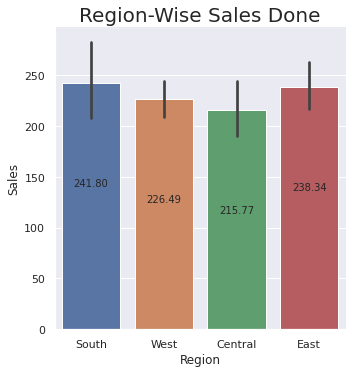

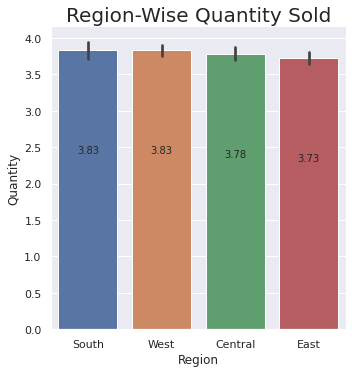

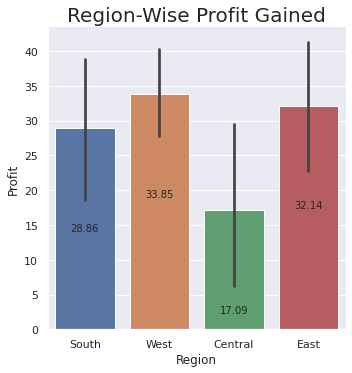

In [12]:
fig = plt.figure(figsize=(14,7))
a = sns.catplot(x='Region',
                y='Sales',
                data=data,
                kind='bar')
for ax in a.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Region-Wise Sales Done", fontsize=20)

b = sns.catplot(x='Region',
                y='Quantity',
                data=data,
                kind='bar')
for ax in b.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Region-Wise Quantity Sold", fontsize=20)

c = sns.catplot(x='Region',
                y='Profit',
                data=data,
                kind='bar')
for ax in c.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Region-Wise Profit Gained", fontsize=20)
plt.show()

From these graphs, we can conclude that
* Sales are more in Southern and Eastern part of US.
* Quantity of products sold in all the regions are almost same and not much of difference.
* Profit gained in Western part of US is comparatively higher followed by Eastern part, Southern part then Central part of US.

## EDA State-Wise

In [30]:
state_group

,State,Sales,Quantity,Profit
0,Alabama,319.846557,4.196721,94.865989
1,Arizona,157.508933,3.848214,-15.303235
2,Arkansas,194.635500,4.000000,66.811452
3,California,228.729451,3.831584,38.171608
4,Colorado,176.418231,3.807692,-35.867351
5,Connecticut,163.223866,3.426829,42.823071
6,Delaware,285.948635,3.822917,103.930988
7,District of Columbia,286.502000,4.000000,105.958930
8,Florida,233.612815,3.600522,-8.875461
9,Georgia,266.825217,3.831522,88.315453


In [31]:
sorted_sales = state_group.sort_values(['Sales'], 
                                        ascending=False)[:10]
sorted_quantity = state_group.sort_values(['Quantity'], 
                                        ascending=False)[:10]
sorted_profit = state_group.sort_values(['Profit'], 
                                        ascending=False)[:10]

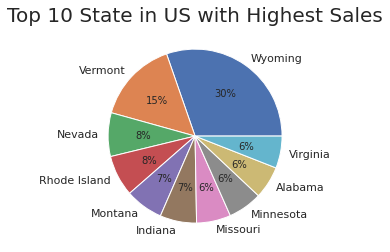

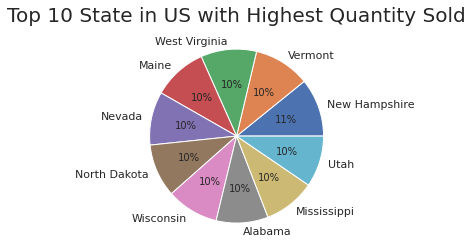

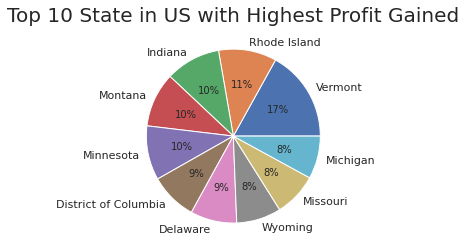

In [32]:
sales_values = sorted_sales.Sales
quantity_values = sorted_quantity.Quantity
profit_values = sorted_profit.Profit

sales_labels = sorted_sales.State
quantity_labels = sorted_quantity.State
profit_labels = sorted_profit.State

plt.pie(sales_values, labels=sales_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Sales", fontsize=20)
plt.show()

plt.pie(quantity_values, labels=quantity_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Quantity Sold", fontsize=20)
plt.show()

plt.pie(profit_values, labels=profit_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Profit Gained", fontsize=20)
plt.show()

From these graphs, we can conclude that
* Wyoming sales are highest among all but with a profit of only 8%.
* Almost all top 10 states have same quantity sold 
* Vermont State gained the highest profit among all.

## EDA Ship Mode Wise

In [36]:
shipmode_group

,Ship Mode,Sales,Quantity,Profit
0,First Class,228.497024,3.701560,31.839948
1,Same Day,236.396179,3.609576,29.266591
2,Second Class,236.089239,3.816452,29.535545
3,Standard Class,227.583067,3.819873,27.494770


Text(0.5, 1.0, 'Shop Mode-Wise Profit Gained')

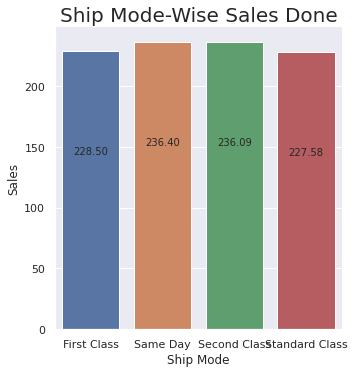

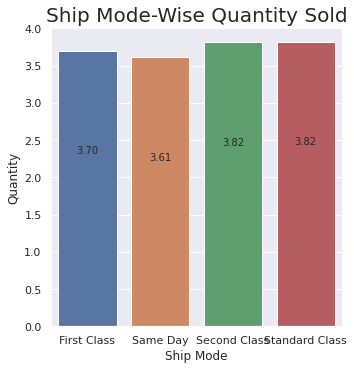

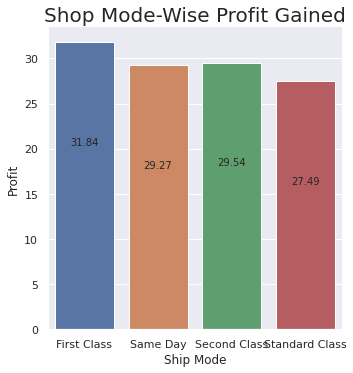

In [37]:
x = sns.catplot(x="Ship Mode", y="Sales", data=shipmode_group, kind='bar')
for ax in x.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Ship Mode-Wise Sales Done", fontsize=20)

y = sns.catplot(x="Ship Mode", y="Quantity", data=shipmode_group, kind='bar')
for ax in y.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Ship Mode-Wise Quantity Sold", fontsize=20)

z = sns.catplot(x="Ship Mode", y="Profit", data=shipmode_group, kind='bar')
for ax in z.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Shop Mode-Wise Profit Gained", fontsize=20)

From these graphs, we can conclude that ship mode doesn't affect the Profit, Sales and Quantity. All types of Ship Mode show the almost same values. 

# Conclusion

From all the EDAs done above, we can infer that
* Technology Category are in demand. So if production in this field will be more, then company can get more profit.
* Profit gain is highest in Home-Office segment. Company must emphasise more to Home-Office segment.
* People in the South and East prefer most of the goods. Company must spread out their products in these part of US.
* Profit are highest in Western part of US. Company should produce more in this part of US but must come with a plan to increase the sales.
* Wyoming State have highest sales and Vermont State have the highest Profit. Company must place all types of products in these states for more profit and sales.